In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz  # ①
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr  # ②
!make  # ③
!make install  # ④
!pip install Ta-Lib

In [2]:
# Numpy のアップグレード
!pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


ランタイムを再起動してください

In [1]:
# 環境変数を設定
!echo 'export LD_LIBRARY_PATH=/usr/lib' >> ~/.bashrc
!source ~/.bashrc

In [2]:
!uname -a

Linux a7d3192093d8 5.10.147+ #1 SMP Sat Dec 10 16:00:40 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux


In [3]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [4]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.9 MB/s eta 0:00:00


<ipython-input-5-820a6c1a4a1f>:17: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


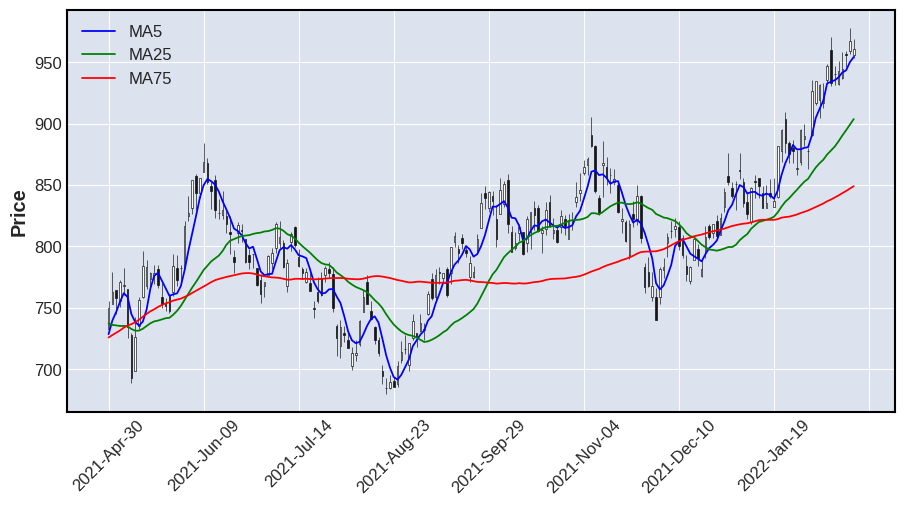

In [5]:
import mplfinance as mpf
import datetime as dt
import talib as ta

df = get_stock_data(3099) # 三越伊勢丹HD
df["ma5"]   = ta.SMA(df["Close"], 5) 
df["ma25"]  = ta.SMA(df["Close"], 25) 
df["ma75"]  = ta.SMA(df["Close"], 75) 

cdf = df[dt.datetime(2021,4,30):dt.datetime(2022,2,20)]
apd = { "MA5": mpf.make_addplot(cdf["ma5"], color="blue"),
         "MA25": mpf.make_addplot(cdf["ma25"], color="green"),
         "MA75": mpf.make_addplot(cdf["ma75"], color="red") }

fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
fig.show()